# TIME EVOLUTION ANALYSIS

In [1]:
import numpy as np

from qho_time_evolution import Param, Operators
import plot

In [20]:
# SIMULATION PARAMETERS

xmin = -20.0
xmax = 20.0
num_x = 40000
tsim = 20
tc = 10
desired_dt = 0.1
num_t = int(tsim/desired_dt)
num_tc = int(tc/desired_dt)
im_time = False

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS -> ADD WFC OFFSET

res = num_x
omega = 1
num_wfcs = 8
T = 1
linear_pulse = lambda t: t/tsim
times = np.linspace(0, tsim, num_t)
pulse = linear_pulse(times)

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [21]:
opr.rho

array([[6.323e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 2.326e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 8.560e-02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 3.150e-02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.160e-02, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.300e-03,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.600e-03, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.000e-04]])

In [22]:
print("Energies\n", opr.energies)

Energies
 [0.499999999999997, 1.4999999999999951, 2.4999999999999862, 3.4999999999999707, 4.49999999999999, 5.49999999999999, 6.499999999999963, 7.49999999999995]


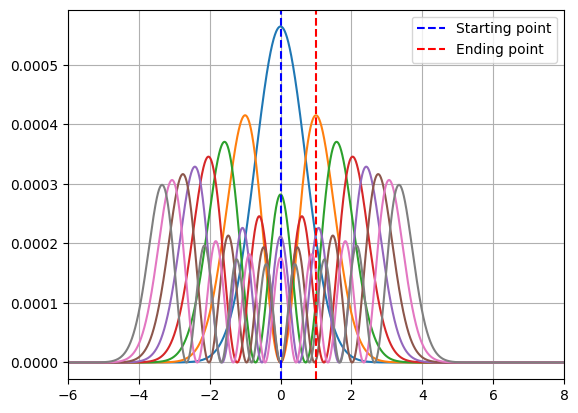

In [23]:
plot.plot_wavefunctions(par, opr)

In [24]:
opr.infidelity()

0.001

In [25]:
opr.time_evolution(par, fixed_potential=False, compute_statistics=True)

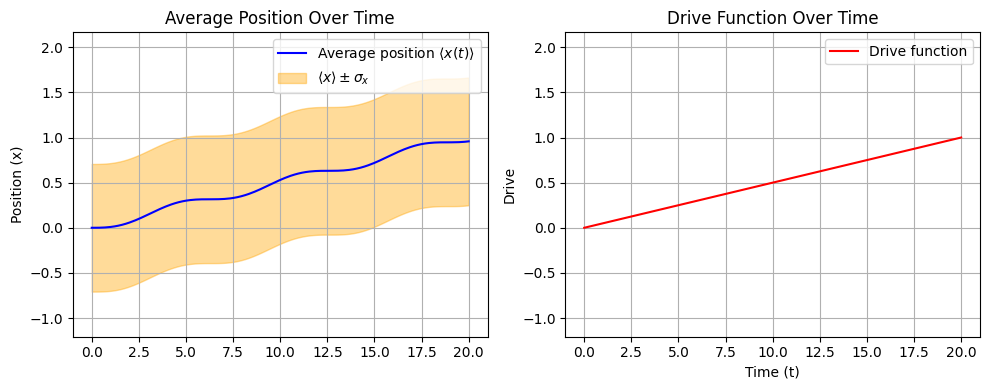

In [26]:
plot.plot_position_statistics(par, opr, 0)

In [27]:
print("Energies\n", opr.energies)

Energies
 [0.501288281047304, 1.5012909114940387, 2.501293541940761, 3.501296172387539, 4.501298802834304, 5.501301433281016, 6.501304063727769, 7.501306694174445]


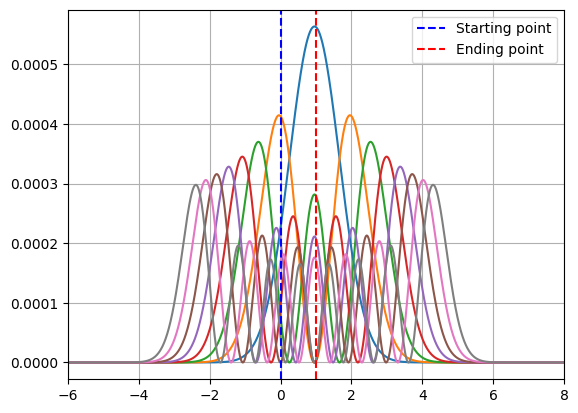

In [28]:
plot.plot_wavefunctions(par, opr)

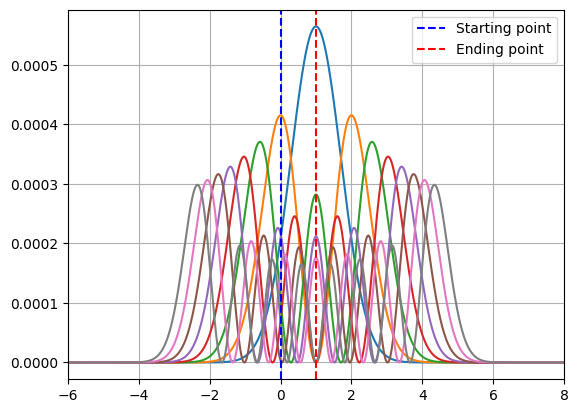

In [29]:
plot.plot_wavefunctions(par, opr, shifted = True)

In [30]:
opr.infidelity()

0.0010000000000000000208

In [31]:
opr.time_evolution(par, fixed_potential=True, compute_statistics=True)

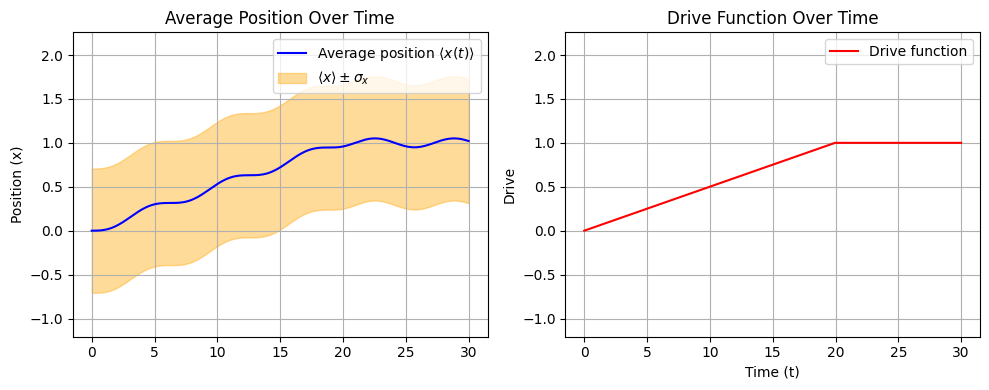

In [32]:
plot.plot_position_statistics(par, opr, 0)

In [33]:
opr.rho

array([[ 6.318e-01+0.j    ,  1.190e-02-0.0078j,  6.000e-04-0.0003j,
         0.000e+00-0.j    ,  0.000e+00+0.j    , -0.000e+00-0.j    ,
         0.000e+00+0.j    ,  0.000e+00+0.j    ],
       [ 1.190e-02+0.0078j,  2.327e-01+0.j    ,  6.200e-03-0.0041j,
         4.000e-04-0.0002j,  0.000e+00-0.j    , -0.000e+00+0.j    ,
        -0.000e+00-0.j    ,  0.000e+00-0.j    ],
       [ 6.000e-04+0.0003j,  6.200e-03+0.0041j,  8.570e-02+0.j    ,
         2.800e-03-0.0018j,  2.000e-04-0.0001j,  0.000e+00-0.j    ,
        -0.000e+00+0.j    , -0.000e+00-0.j    ],
       [ 0.000e+00+0.j    ,  4.000e-04+0.0002j,  2.800e-03+0.0018j,
         3.160e-02+0.j    ,  1.200e-03-0.0008j,  1.000e-04-0.j    ,
         0.000e+00-0.j    , -0.000e+00+0.j    ],
       [ 0.000e+00-0.j    ,  0.000e+00+0.j    ,  2.000e-04+0.0001j,
         1.200e-03+0.0008j,  1.160e-02+0.j    ,  5.000e-04-0.0003j,
         0.000e+00-0.j    ,  0.000e+00-0.j    ],
       [-0.000e+00+0.j    , -0.000e+00-0.j    ,  0.000e+00+0.j    ,
       

In [34]:
print("Energies\n", opr.energies)

Energies
 [0.5012867504913503, 1.5012897963664127, 2.5012928422414724, 3.5012958881165903, 4.501298933991694, 5.501301979866784, 6.501305025741867, 7.5013080716169105]


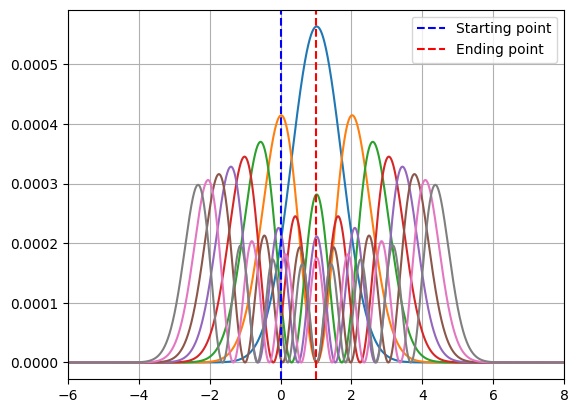

In [35]:
plot.plot_wavefunctions(par, opr)

In [36]:
opr.infidelity()

0.0010000000000000000208

In [37]:
opr.average_infidelity

0.0010000000000000000208

# TEMPERATURE ANALYSIS

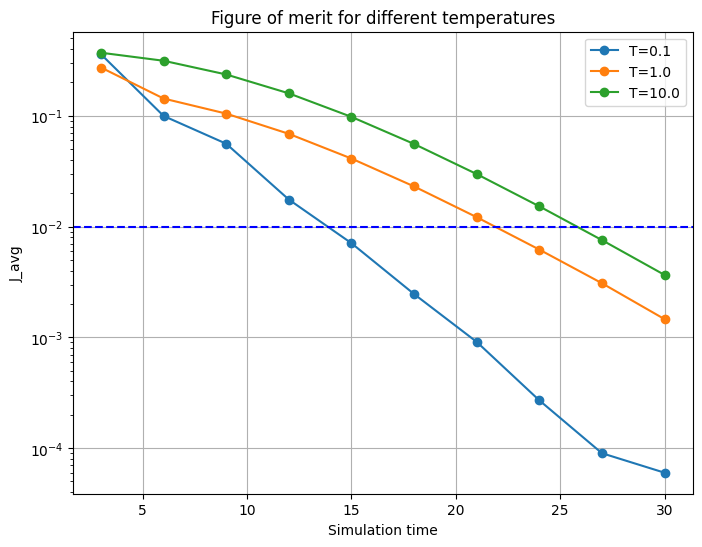

In [20]:
data = plot.load_data_temp("temperature.txt")
plot.plot_data_temp(data)

# TESTING THE PULSE

In [100]:
from optimization import load_fom, load_best_results

timestamp = "20250307_134828"

fomlist = load_fom(timestamp)
timegrid, pulse = load_best_results(timestamp)

Files inside the archive: ['Pulse_1.npy', 'time_grid_for_Pulse_1.npy', 'pulse_names.npy', 'parameter_names.npy', 'time_names.npy', 'FoM.npy', 'iteration_number.npy', 'super_it.npy', 'status_code.npy']


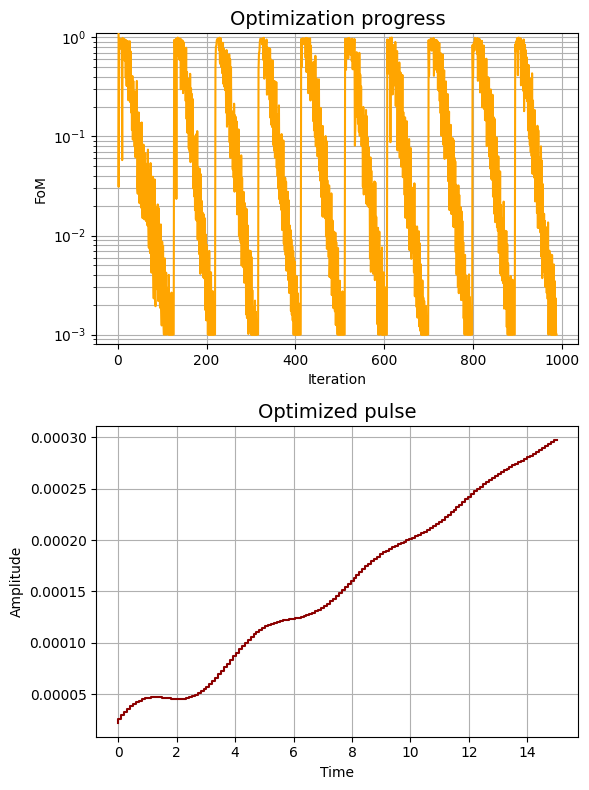

In [101]:
plot.plot_optimization_process(fomlist, timegrid, pulse)

In [103]:
# SIMULATION PARAMETERS

xmin = -20.0
xmax = 20.0
num_x = 4000
tsim = 15
tc = 10
desired_dt = 0.1
num_t = int(tsim/desired_dt)
num_tc = int(tc/desired_dt)
im_time = False

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS -> ADD WFC OFFSET

res = num_x
omega = 1.0
num_wfcs = 8
T = 1

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [104]:
opr.energies

[0.4999999999999997,
 1.499999999999997,
 2.499999999999999,
 3.499999999999999,
 4.4999999999999964,
 5.500000000000006,
 6.500000000000001,
 7.5000000000000036]

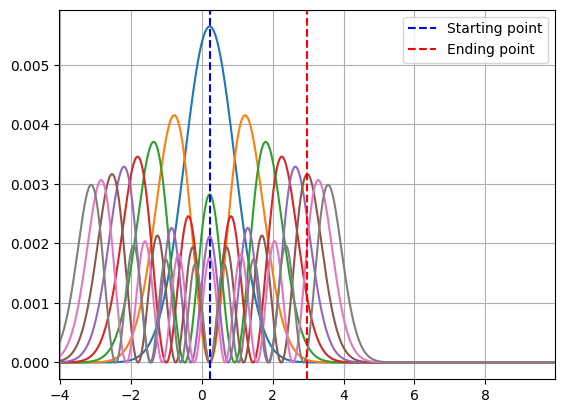

In [105]:
plot.plot_wavefunctions(par, opr)

In [106]:
opr.time_evolution(par, fixed_potential=False, compute_statistics=True)

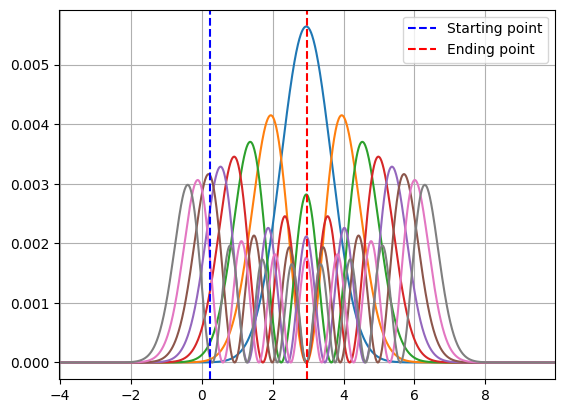

In [107]:
plot.plot_wavefunctions(par, opr)

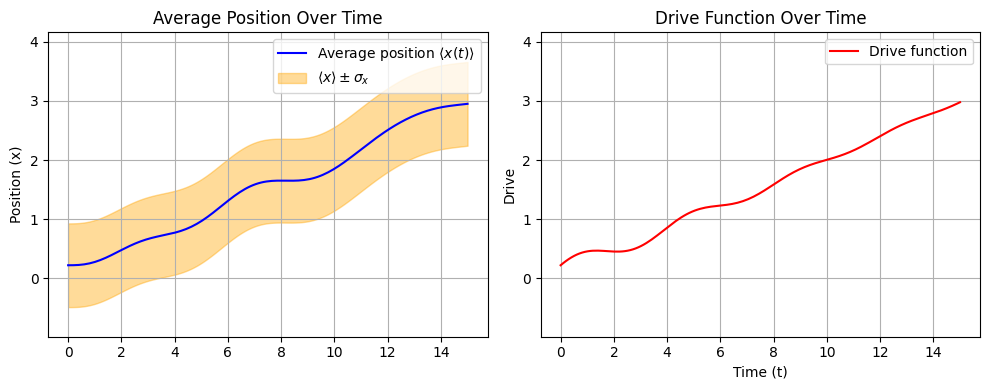

In [108]:
plot.plot_position_statistics(par, opr, 0)

In [109]:
opr.energies

[0.5018117211427157,
 1.5018130265885878,
 2.501814332034454,
 3.501815637480335,
 4.501816942926229,
 5.501818248372082,
 6.501819553817954,
 7.50182085926383]

In [110]:
opr.time_evolution(par, fixed_potential=True, compute_statistics=True)

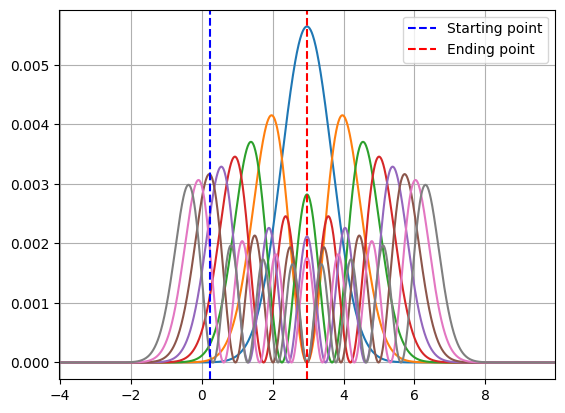

In [111]:
plot.plot_wavefunctions(par, opr)

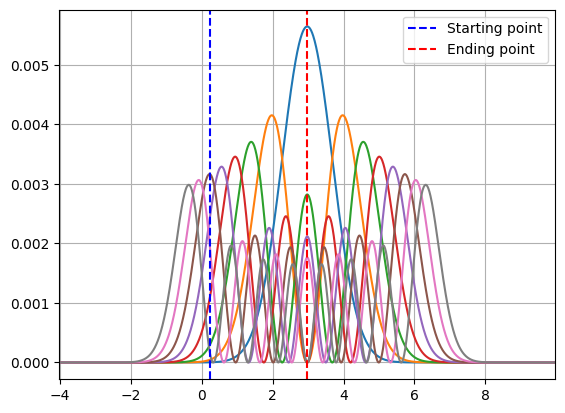

In [112]:
plot.plot_wavefunctions(par, opr, shifted=True)

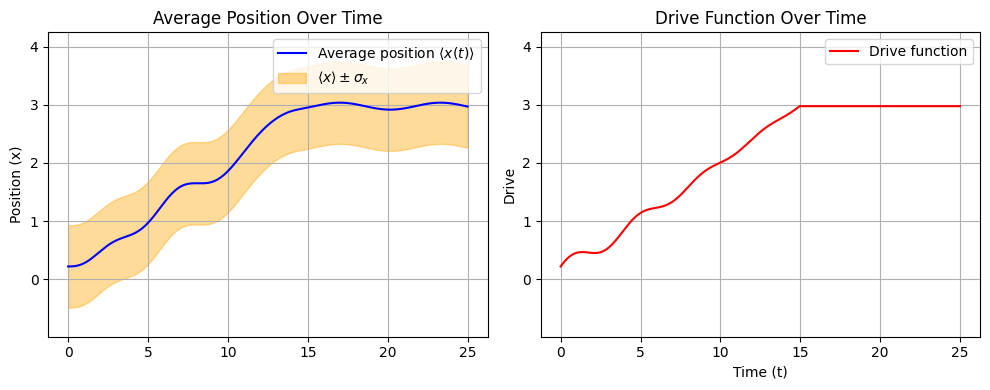

In [113]:
plot.plot_position_statistics(par, opr, 0)

In [99]:
opr.energies

[0.5014295347514557,
 1.501432580626535,
 2.5014356265016056,
 3.5014386723766906,
 4.501441718251784,
 5.501444764126837,
 6.5014478100019355,
 7.501450855876997]